https://uday-agarwal.medium.com/kannada-recognition-using-machine-learning-9e913aed0806

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow as tf
print(tf.__version__)
import seaborn as sns

2.12.0


In [22]:
train = pd.read_csv(r"C:\Birla\Sem_2\TCS\ML\IA-2\Kanada_Datasets\train.csv")
test = pd.read_csv(r"C:\Birla\Sem_2\TCS\ML\IA-2\Kanada_Datasets\test.csv")
sample_sub = pd.read_csv(r"C:\Birla\Sem_2\TCS\ML\IA-2\Kanada_Datasets\sample_submission.csv")

In [23]:
print(train.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      0       0       0       0       0       0       0       0       0   
1      1       0       0       0       0       0       0       0       0   
2      2       0       0       0       0       0       0       0       0   
3      3       0       0       0       0       0       0       0       0   
4      4       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [24]:
print(test.head())

   id  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0   0       0       0       0       0       0       0       0       0       0   
1   1       0       0       0       0       0       0       0       0       0   
2   2       0       0       0       0       0       0       0       0       0   
3   3       0       0       0       0       0       0       0       0       0   
4   4       0       0       0       0       0       0       0       0       0   

   ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0  ...         0         0         0         0         0         0         0   
1  ...         0         0         0         0         0         0         0   
2  ...         0         0         0         0         0         0         0   
3  ...         0         0         0         0         0         0         0   
4  ...         0         0         0         0         0         0         0   

   pixel781  pixel782  pixel783 

In [25]:
train.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

In [26]:
test.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

In [27]:
# Getting the train label from the train dataset in y_train
y_train = train['label']

# Droping the label column from the train dataset for x_train 
X_train = train.drop("label", axis=1)

X_test = test.drop("id", axis=1)

In [28]:
print("X_train Shape: ", X_train.shape)
print("y_train Shape: ", y_train.shape)
print("X_test Shape ", X_test.shape)

X_train Shape:  (60000, 784)
y_train Shape:  (60000,)
X_test Shape  (5000, 784)


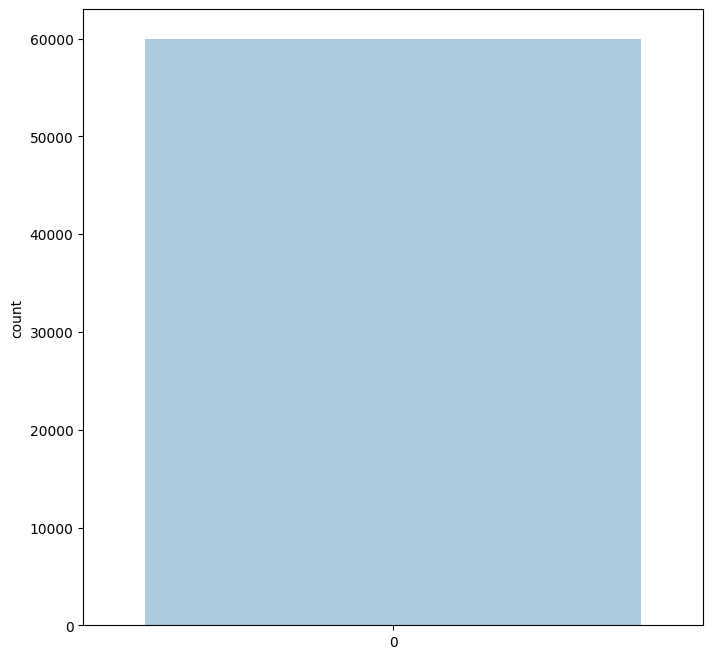

In [29]:
# Visualizing Distribution:-
plt.figure(figsize=(8, 8))
sns.countplot(y_train, palette = "Paired")
plt.show()

In [30]:
images = train.iloc[:, 1:].values.astype(np.float64)

# Convert from [0:255] --> [0.0:1.0]
images = np.multiply(images, 1.0 / 255.0)

image_size = images.shape[1]
print("image size in rows: ", image_size)

# All images are square
image_width = image_height = np.ceil(np.sqrt(image_size)).astype(np.uint8)

print(f"Image Width: {image_width}, Image Height: {image_height}")

image size in rows:  784
Image Width: 28, Image Height: 28


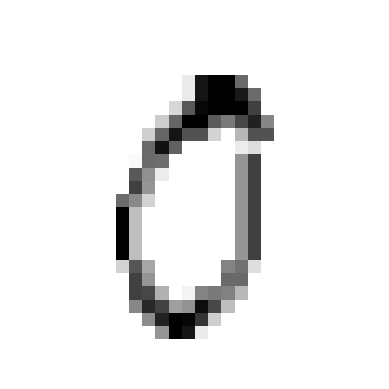

In [31]:
# Displaying the image
def display(img):
    # (784) --> (28, 28)
    one_image = img.reshape(image_width, image_height)
    plt.axis("off")
    plt.imshow(one_image, cmap="binary")

# Output Image
display(images[0])

In [32]:
# Normalizing the data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [33]:
# One-Hot Encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10, dtype="uint8")
# 0 --> [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [34]:
# Whatever the size of the matrix is we reshape it to 28 X 28 matrix
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

In [35]:
X_train.shape

(60000, 28, 28, 1)

In [36]:
X_test.shape

(5000, 28, 28, 1)

In [37]:
# Splitting the data into train data and validation data.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=44)

In [42]:
# Creating the architecture of the model.

import tensorflow

from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation = "relu", input_shape = (28, 28, 1)))
model.add(layers.Conv2D(32, (5, 5), activation = "relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (5, 5), activation = "relu"))
model.add(layers.Conv2D(64, (5, 5), activation = "relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation = "relu"))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10, activation = "softmax"))

In [43]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [44]:
history = model.fit(X_train, y_train, batch_size=1000, epochs=10, validation_data=(X_val, y_val), verbose=2)

Epoch 1/10
54/54 - 97s - loss: 0.7345 - accuracy: 0.7494 - val_loss: 0.1201 - val_accuracy: 0.9638 - 97s/epoch - 2s/step
Epoch 2/10
54/54 - 99s - loss: 0.1474 - accuracy: 0.9554 - val_loss: 0.0625 - val_accuracy: 0.9815 - 99s/epoch - 2s/step
Epoch 3/10
54/54 - 101s - loss: 0.0964 - accuracy: 0.9718 - val_loss: 0.0473 - val_accuracy: 0.9852 - 101s/epoch - 2s/step
Epoch 4/10
54/54 - 90s - loss: 0.0695 - accuracy: 0.9799 - val_loss: 0.0349 - val_accuracy: 0.9898 - 90s/epoch - 2s/step
Epoch 5/10


In [ ]:
# Predicting the model on the test data

prediction = model.predict(X_test)

In [ ]:
# Getting the first predictions
prediction[0]

In [ ]:
max_index = 0
for i in range(0, len(prediction[0])):
    if prediction[0][i] > prediction[0][max_index]:
        max_index = 1

In [ ]:
print("Predicted Value : ", max_index)